In [1]:
## IMPORTS
%matplotlib inline
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm

warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("../../all_csvs/artificial.csv", keep_default_na=False)

In [3]:
for col in df.columns:
        if df[col].dtype != "object":
            df = df.drop(columns = col)

In [4]:
array = df.to_numpy()

In [5]:
array = array.transpose()

In [6]:
len(array[0])

4177

In [7]:
for i in range(len(array)):
    for j in range(len(array[i])):
        array[i][j] = str(array[i][j])

In [8]:
print(len(array[0]))
print(array[0])

4177
['M' 'M' 'F' ... 'M' 'F' 'M']


In [9]:
array = array.transpose()

In [10]:
col_string = []
for col in df.columns:
    if df[col].dtype == "object":
        col_string.append(col)

In [11]:
col_string

['Sex', 'categorical2', 'categorical3']

In [12]:
array

array([['M', 'p', 'A'],
       ['M', 'e', 'W'],
       ['F', 'e', 'H'],
       ...,
       ['M', 'p', 'W'],
       ['F', 'p', 'B'],
       ['M', 'e', 'B']], dtype=object)

In [13]:
df = pd.DataFrame(array, columns = col_string)

In [14]:
df

,Sex,categorical2,categorical3
0,M,p,A
1,M,e,W
2,F,e,H
3,M,p,W
4,,,
...,...,...,...
4172,F,p,W
4173,M,p,H
4174,M,p,W
4175,F,p,B


In [15]:
vetor = len(col_string)*[[]]

In [16]:
vetor

[[], [], []]

In [17]:
for i in range(len(col_string)):
    vetor[i] = list(pd.unique(df[col_string[i]]))

In [18]:
vetor

[['M', 'F', '', 'I', 'px399'],
 ['p', 'e', '', 'px399'],
 ['A', 'W', 'H', '', 'B', 'O', 'N', 'px399']]

In [19]:
for i in range(len(vetor)):
    for j in range(len(vetor[i])):
        vetor[i][j] = str(vetor[i][j])

In [20]:
vetor

[['M', 'F', '', 'I', 'px399'],
 ['p', 'e', '', 'px399'],
 ['A', 'W', 'H', '', 'B', 'O', 'N', 'px399']]

In [21]:
len(vetor)

3

In [22]:
array = len(col_string)*[[]]
for i in range(len(col_string)):
    array[i] = len(vetor[i])*[[]]

In [23]:
array

[[[], [], [], [], []], [[], [], [], []], [[], [], [], [], [], [], [], []]]

In [24]:
for i in range(len(col_string)):
    for j in range(len(vetor[i])):
        array[i][j] = df[ df[ col_string[i] ] == vetor[i][j] ].shape[0]

In [25]:
array

[[1526, 1304, 7, 1338, 2],
 [816, 3352, 7, 2],
 [73, 1978, 714, 303, 1003, 38, 66, 2]]

In [26]:
colors = len(array)*[[]]
for i in range(len(array)):
    n = len(set(array[0]))
    colors[i] = [cm.hsv(i * 1.0 /n, 1) for i in range(n)]

In [27]:
# colors = len(array)*[[]]
# for i in range(len(array)):
#     npray = np.array(array[i])
#     colors[i] = cm.hsv(npray/ float(max(npray)))

In [28]:
colors

[[(1.0, 0.0, 0.0, 1.0),
  (0.8187488187488188, 1.0, 0.0, 1.0),
  (0.0, 1.0, 0.3625004724974957, 1.0),
  (0.0, 0.4562523625023627, 1.0, 1.0),
  (0.724998818748819, 0.0, 1.0, 1.0)],
 [(1.0, 0.0, 0.0, 1.0),
  (0.8187488187488188, 1.0, 0.0, 1.0),
  (0.0, 1.0, 0.3625004724974957, 1.0),
  (0.0, 0.4562523625023627, 1.0, 1.0),
  (0.724998818748819, 0.0, 1.0, 1.0)],
 [(1.0, 0.0, 0.0, 1.0),
  (0.8187488187488188, 1.0, 0.0, 1.0),
  (0.0, 1.0, 0.3625004724974957, 1.0),
  (0.0, 0.4562523625023627, 1.0, 1.0),
  (0.724998818748819, 0.0, 1.0, 1.0)]]

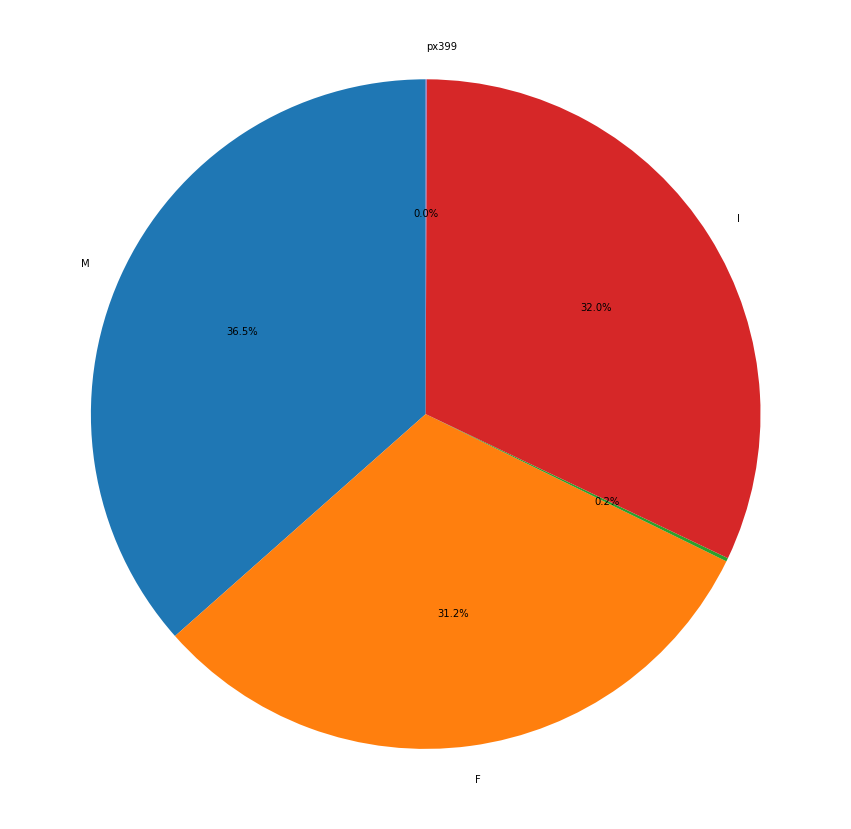

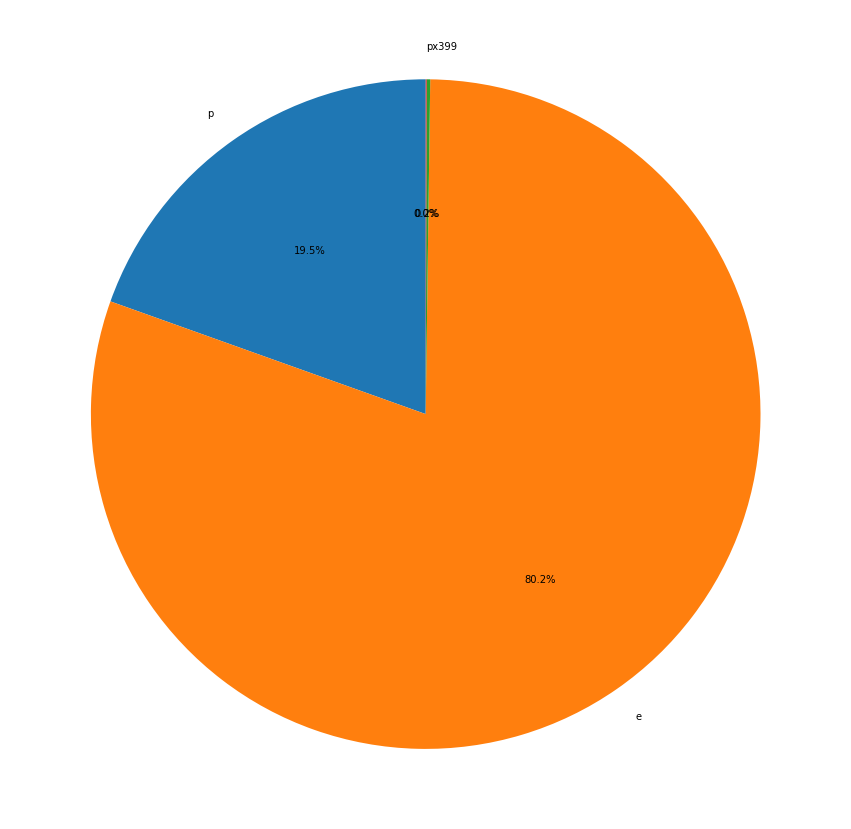

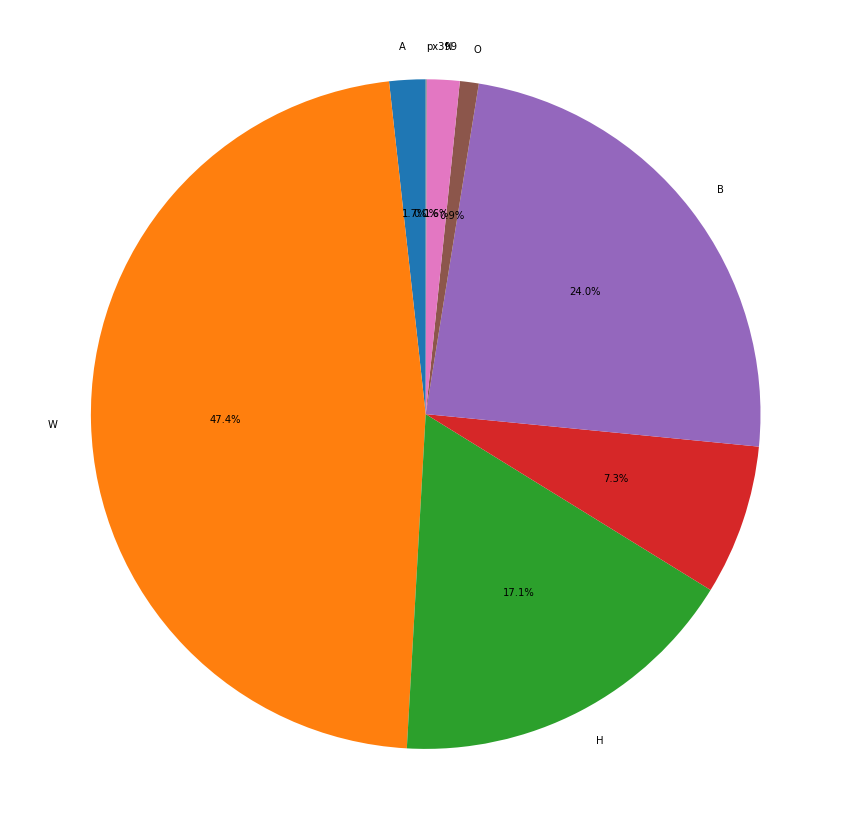

In [29]:
for i in range(len(array)):    
    fig1, ax1 = plt.subplots(figsize=(15, 15))
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.pie(array[i], labels=vetor[i], autopct='%1.1f%%', shadow=False, startangle=90)
    #     plt.savefig("plot/pie_"+col_string[i]+"_.jpg")

In [30]:
my_colors = 'rgbkymc'

In [31]:
df.dtypes

Sex             object
categorical2    object
categorical3    object
dtype: object

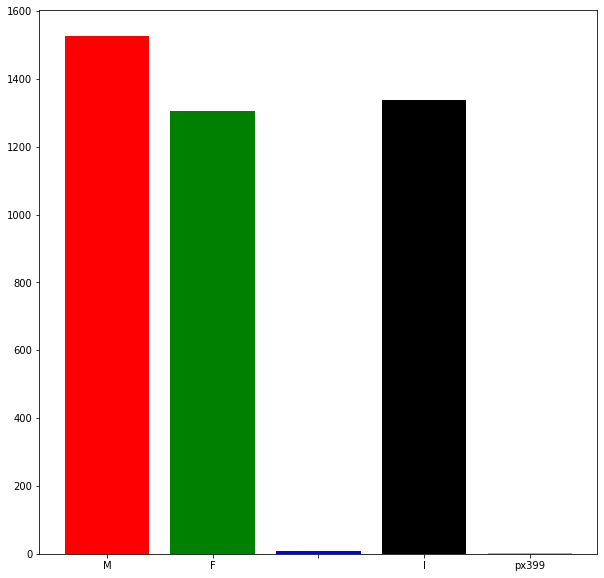

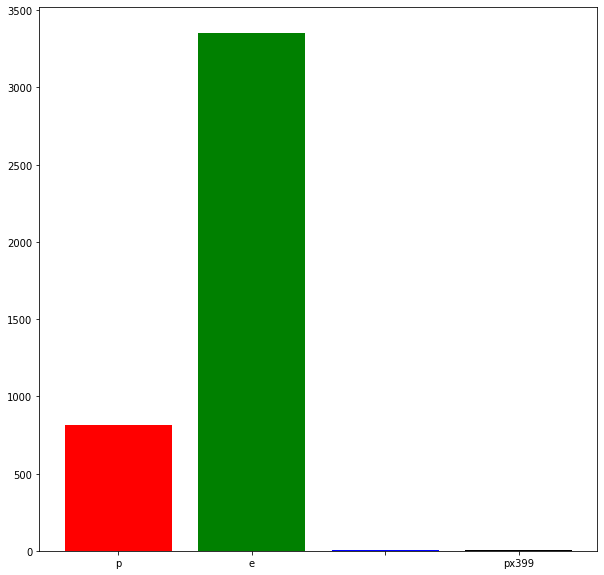

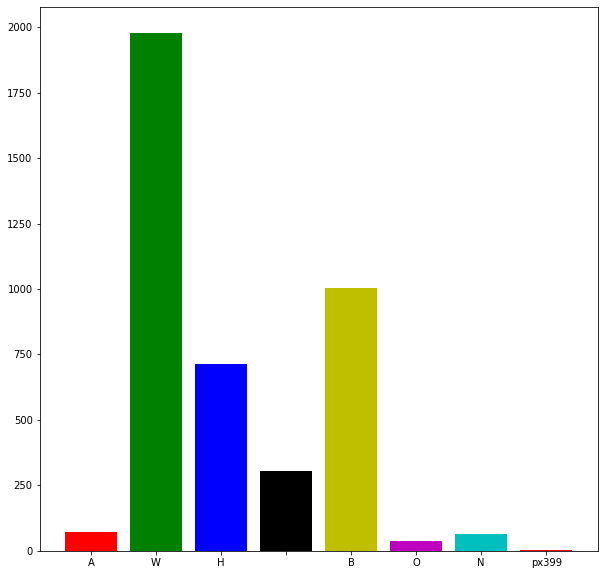

In [32]:
for i in range(len(array)):    
    fig1, ax1 = plt.subplots(figsize=(10, 10))
    ax1.bar(vetor[i], height=array[i], color = my_colors)
#     plt.savefig("plot/bar_"+col_string[i]+"_.jpg")
    plt.show()